Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


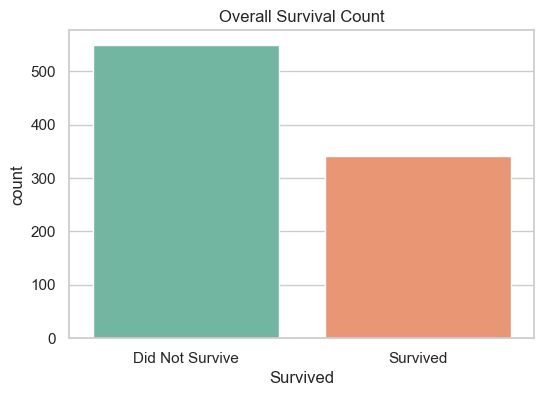

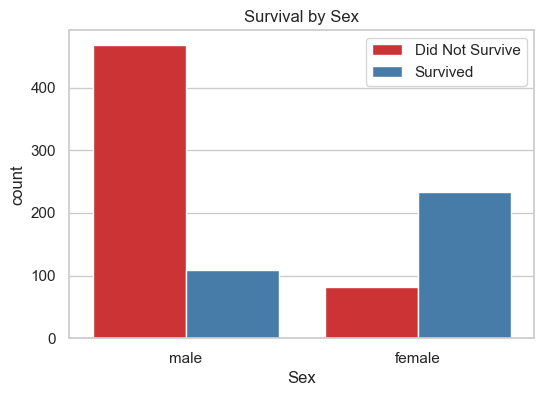

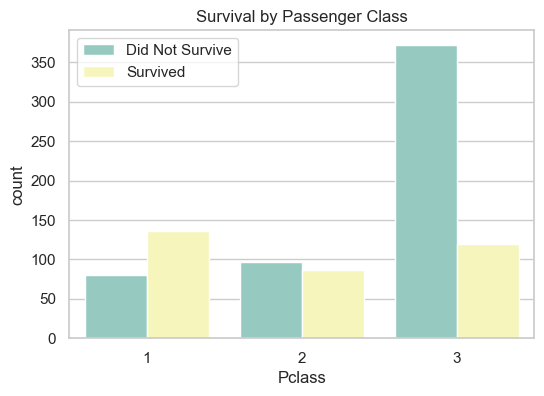

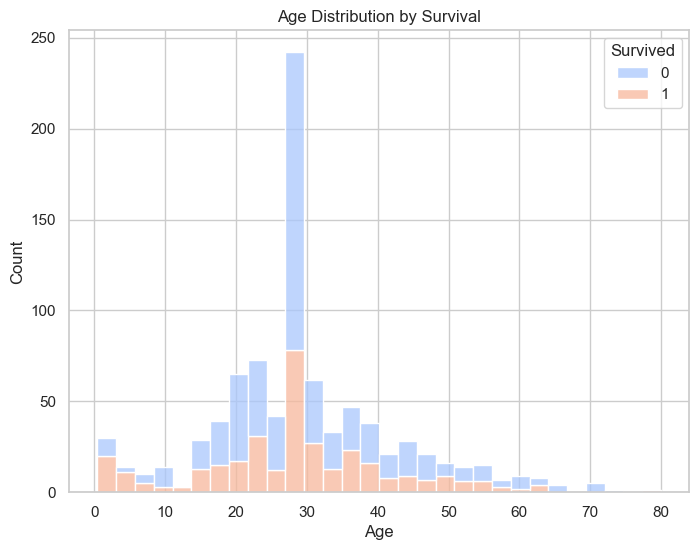

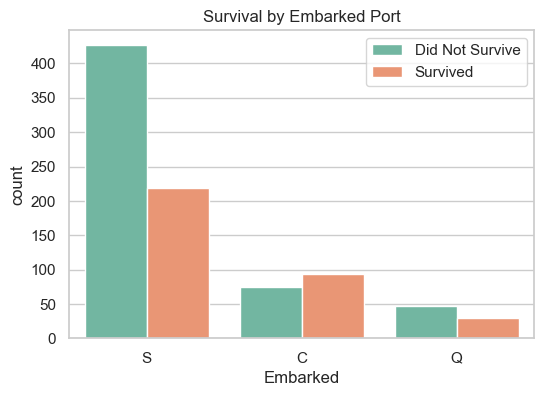

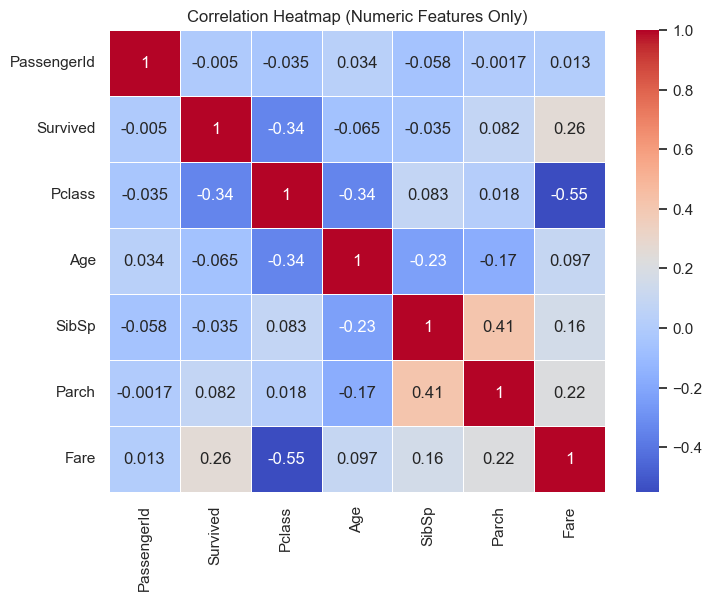

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv("train.csv")

train_df.drop(columns=["Cabin"], inplace=True)

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

print("Missing values after cleaning:\n", train_df.isnull().sum())

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette="Set2")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.title("Overall Survival Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette="Set1")
plt.title("Survival by Sex")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette="Set2")
plt.title("Survival by Embarked Port")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1. Load datasets
# ----------------------------
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# ----------------------------
# 2. Combine for consistent preprocessing
# ----------------------------
test_df['Survived'] = -1  # Placeholder
combined = pd.concat([train_df, test_df], sort=False)

# ----------------------------
# 3. Clean and Feature Engineering
# ----------------------------

# Fill missing 'Age' with median
combined['Age'].fillna(combined['Age'].median(), inplace=True)

# Fill missing 'Fare' with median (only in test set)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)

# Fill missing 'Embarked' with mode
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' and 'Ticket' (useless or too many missing)
combined.drop(columns=['Cabin', 'Ticket'], inplace=True)

# Extract 'Title' from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt','Col','Don', 
                                                'Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Convert categorical to numeric
label_encoders = {}
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])
    label_encoders[col] = le  # Store encoder if needed later

# Create new feature: FamilySize
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1

# Drop unneeded columns
combined.drop(columns=['Name', 'PassengerId'], inplace=True)

# ----------------------------
# 4. Split back into train and test
# ----------------------------
train_cleaned = combined[combined['Survived'] != -1]
test_cleaned = combined[combined['Survived'] == -1].drop(columns=['Survived'])

X_train = train_cleaned.drop(columns=['Survived'])
y_train = train_cleaned['Survived']
X_test = test_cleaned

# ----------------------------
# 5. Train model
# ----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ----------------------------
# 6. Predict on test.csv
# ----------------------------
predictions = model.predict(X_test)

# ----------------------------
# 7. Prepare submission file
# ----------------------------
test_original = pd.read_csv("test.csv")  # Reload to get PassengerId
submission = pd.DataFrame({
    'PassengerId': test_original['PassengerId'],
    'Survived': predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved successfully!")


<>:34: SyntaxWarning: invalid escape sequence '\.'
<>:34: SyntaxWarning: invalid escape sequence '\.'
C:\Users\thush\AppData\Local\Temp\ipykernel_13964\3555463881.py:34: SyntaxWarning: invalid escape sequence '\.'
  combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\thush\AppData\Local\Temp\ipykernel_13964\3555463881.py:34: SyntaxWarning: invalid escape sequence '\.'
  combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


ModuleNotFoundError: No module named 'sklearn'

In [2]:
pip install sklearn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-